# 线性回归模型，自定义损失函数

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras
print(sys.version_info)
for module in np, pd ,sklearn, tf,:
    print(module.__name__,module.__version__)

sys.version_info(major=3, minor=7, micro=6, releaselevel='final', serial=0)
numpy 1.18.1
pandas 1.0.1
sklearn 0.22.2
tensorflow 2.0.0


In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

# print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)


(20640, 8)
(20640,)


In [3]:
from sklearn.model_selection import train_test_split

x_train_all,x_test,y_train_all,y_test=train_test_split(housing.data, housing.target,random_state=7)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_all,y_train_all,random_state=11)

In [4]:
from sklearn.preprocessing import StandardScaler
transfer = StandardScaler()
x_train_scaled = transfer.fit_transform(x_train)
x_test_scaled = transfer.transform(x_test)
x_valid_scaled = transfer.transform(x_valid)

In [5]:
#函数式API
input = keras.layers.Input(shape=x_train.shape[1:])
hidden1=keras.layers.Dense(100,activation='relu')(input)
hidden2=keras.layers.Dense(100,activation='relu')(hidden1)

cancat = keras.layers.concatenate([input, hidden2])#用concatenate把两个层连接起来
output = keras.layers.Dense(1)(cancat)

model = keras.models.Model(input, output)
def customized_mse(y_ture,y_pred):
    '''自定义均方差损失函数'''
    return tf.reduce_mean(tf.square(y_pred-y_ture))



model.compile(loss=customized_mse,#'使用自定义的mean_squared_error',
             optimizer = 'nadam',# SGD -> SGDM -> NAG ->AdaGrad -> AdaDelta -> Adam -> Nadam
              metrics=['mean_squared_error']#放入内置的损失函数mse做对比
             )


In [6]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 100)          900         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 100)          10100       dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 108)          0           input_1[0][0]                    
                                                                 dense_1[0][0]                

In [7]:
callbacks = [keras.callbacks.EarlyStopping(patience=5,min_delta=1e-2)]
history = model.fit(x_train_scaled,y_train,epochs=3,
                  validation_data=(x_valid_scaled,y_valid), 
                  callbacks= callbacks )

Train on 11610 samples, validate on 3870 samples
Epoch 1/3
11610/11610 [==============================] - 6s 513us/sample - loss: 0.7195 - mean_squared_error: 0.7195 - val_loss: 0.4171 - val_mean_squared_error: 0.4171
Epoch 2/3
11610/11610 [==============================] - 3s 222us/sample - loss: 0.3871 - mean_squared_error: 0.3871 - val_loss: 0.4291 - val_mean_squared_error: 0.4291
Epoch 3/3
11610/11610 [==============================] - 3s 224us/sample - loss: 0.3769 - mean_squared_error: 0.3769 - val_loss: 0.4098 - val_mean_squared_error: 0.4098


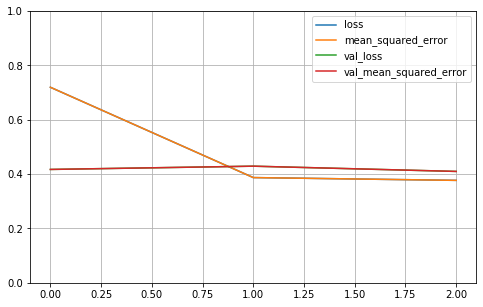

In [8]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=[8,5])
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()

plot_learning_curves(history)

In [10]:
model.evaluate(x_test_scaled,y_test,verbose=2)


5160/1 - 0s - loss: 0.7593 - mean_squared_error: 0.9890


[0.9890222567458485, 0.9890225]